In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve

In [7]:
df1=pd.read_csv('newDi.csv')


In [8]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [9]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,265,208,2177,332,1,1.0,0.0,0.0,0
1,3972,330,2660,485,5,1.0,1.0,1.0,0
2,1185,166,1254,177,0,0.0,0.0,1.0,0
3,60304,2248,202968,981,101,1.0,0.0,1.0,0
4,5,21,82,79,0,0.0,1.0,1.0,0


In [10]:
df1.shape

(6825, 9)

In [11]:
X=df1.drop('Is_Fake',axis=1)

In [12]:
y=df1['Is_Fake']

In [13]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

In [14]:
cross_val_score(SVC(),X,y,scoring='accuracy',cv=cv)

array([0.91162109, 0.90820312, 0.90869141, 0.91601562, 0.91503906,
       0.90869141, 0.92675781, 0.92431641, 0.92089844, 0.91748047])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 8)
(2048, 8)
(4777,)
(2048,)


In [17]:
sv=SVC()

In [18]:
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
prediction=sv.predict(x_test)

In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1074
           1       0.85      0.99      0.91       974

    accuracy                           0.91      2048
   macro avg       0.92      0.92      0.91      2048
weighted avg       0.92      0.91      0.91      2048



In [21]:
confusion_matrix(y_test,prediction)

array([[902, 172],
       [  9, 965]])

In [22]:
fpr, tpr, thresholds=roc_curve(y_test,prediction)

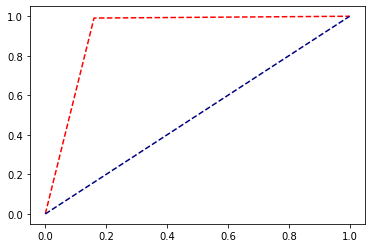

In [23]:
plt.plot(fpr,tpr,linestyle='--',color='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Loss: ",metrics.log_loss(y_test, prediction))

Accuracy: 0.91162109375
Loss:  3.0525664346859513


In [25]:
import pickle

In [32]:
%cd Models
with open('Svc.pkl','wb') as f:
    pickle.dump(sv,f)

/content/drive/My Drive/project/Models
